In [1]:
import torch
from vast.DistributionModels import weibull
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
training_data = abs(torch.normal(0.0, 0.5, size = (1,25)))
testing_data = torch.sort(torch.normal(0.0, 1.0, size = (1500,1)),dim=0)[0]

In [11]:
tailsize = 20

### FitHigh v/s FitHighFlipped v/s FitLow

In [12]:
mr = weibull.weibull()
mr.FitHigh(training_data, tailsize)
FitHigh = mr.wscore(testing_data)
FitHigh_pdf = mr.pdf(testing_data)

In [13]:
mr = weibull.weibull()
mr.FitHigh(training_data, tailsize, isReversed=True)
FitHighReversed = mr.wscore(testing_data)
FitHighReversed_pdf = mr.pdf(testing_data)

In [14]:
mr = weibull.weibull()
mr.FitLowNormalized(training_data, tailsize)
FitLowNormalized = mr.wscore(testing_data)
FitLowNormalized_pdf = mr.pdf(testing_data)

In [15]:
mr = weibull.weibull()
mr.FitLow(training_data, tailsize)
FitLow = mr.wscore(testing_data)
FitLow_pdf = mr.pdf(testing_data)

In [16]:
mr = weibull.weibull()
mr.FitLow(training_data, tailsize, isReversed=True)
FitLowReversed = mr.wscore(testing_data)
FitLowReversed_pdf = mr.pdf(testing_data)

### WScore

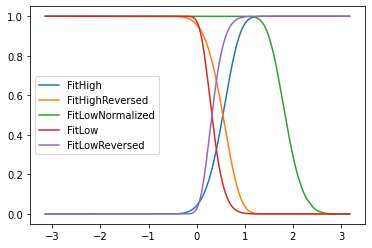

In [17]:
plt.plot(testing_data, FitHigh, label='FitHigh')
plt.plot(testing_data, FitHighReversed, label='FitHighReversed')
plt.plot(testing_data, FitLowNormalized, label='FitLowNormalized')
plt.plot(testing_data, FitLow, label='FitLow')
plt.plot(testing_data, FitLowReversed, label='FitLowReversed')
plt.legend()
plt.show()

### PDF

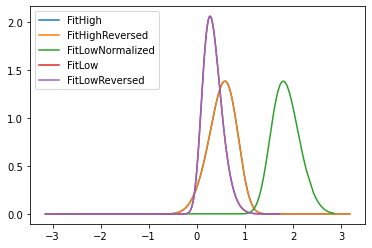

In [18]:
plt.plot(testing_data, FitHigh_pdf, label='FitHigh')
plt.plot(testing_data, FitHighReversed_pdf, label='FitHighReversed')
plt.plot(testing_data, FitLowNormalized_pdf, label='FitLowNormalized')
plt.plot(testing_data, FitLow_pdf, label='FitLow')
plt.plot(testing_data, FitLowReversed_pdf, label='FitLowReversed')
plt.legend()
plt.show()

### Effect of translate amount tensor on FitHigh

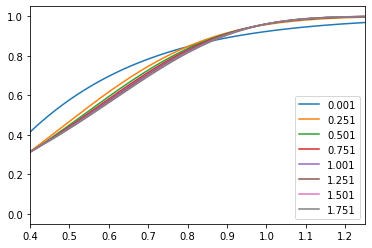

In [19]:
for i in torch.arange(0.001, 2, 0.25):
    mr = weibull.weibull(translateAmount=i)
    mr.FitHigh(training_data, tailsize)
    FitHigh = mr.wscore(testing_data)
    plt.plot(testing_data, FitHigh, label=f'{i:.3f}')
plt.xlim([0.4, 1.25])
plt.legend()
plt.show()